In [1]:
import pandas as pd

def parse_score_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Find the header row (column names)
    header = None
    for line in lines:
        if line.startswith("SCORE: total_score"):
            header = line.strip().split()[1:]  # Skip "SCORE:" at the beginning
            break

    if not header:
        print("Header not found in file.")
        return None

    # Columns to extract (ddg columns)
    ddg_columns = [col for col in header if col.startswith("ddg_")]

    # Prepare data extraction
    data = []
    descriptions = []

    # Extract relevant rows
    for line in lines:
        if line.startswith("SCORE:"):
            parts = line.strip().split()
            description = parts[-1]  # Last part is the description
            descriptions.append(description)

            # Get the ddg values, with error handling for non-numeric values
            row = []
            for col in ddg_columns:
                try:
                    value = float(parts[header.index(col) + 1])
                    row.append(value)
                except (ValueError, IndexError):
                    row.append(None)  # Append None for any missing or invalid values
            data.append(row)

    # Create DataFrame
    df = pd.DataFrame(data, columns=ddg_columns)
    df.insert(0, "Description", descriptions)  # Insert description as the first column

    return df


# Load and parse the score file
file_path = 'ssm_scan.sc'  # Update with your file path
df = parse_score_file(file_path)

# Display the DataFrame or save to a CSV
print(df)
df.to_csv('ddg_values_only.csv', index=False)


    Description  ddg_ala  ddg_arg  ddg_asn  ddg_asp  ddg_cys  ddg_gln  \
0   description      NaN      NaN      NaN      NaN      NaN      NaN   
1   SwIL15_120A  -10.872   -8.271  -10.973   -9.854  -11.603  -10.835   
2   SwIL15_121A  -10.872  136.196  111.745   79.881   54.511  223.477   
3   SwIL15_122A  -10.872  -10.972  -10.473  -10.869  -10.984  -11.116   
4   SwIL15_123A  -10.872  -12.047  -10.946  -10.506  -10.886  -10.962   
5   SwIL15_124A  -10.872    9.392  -12.535  -10.867  -12.543  -12.130   
6   SwIL15_125A  -10.872  -12.984  -10.125   -9.497  -11.864  -13.196   
7   SwIL15_126A  -10.872  -11.987  -10.872  -10.876  -10.872  -10.871   
8   SwIL15_127A  -10.872   13.962  -10.889   -7.946  -11.447  -10.797   
9   SwIL15_128A  -10.872  420.616  374.436   24.554   44.250  230.295   
10  SwIL15_129A  -10.872  -10.417  -12.078  -17.442  -11.643  -11.140   
11  SwIL15_130A  -10.872  -10.004  -10.310  -10.943  -10.785  -13.114   
12  SwIL15_131A  -10.872  -11.420  -11.644  -10.822

In [2]:
# Read the raw file and print a few lines to understand its structure
file_path = 'ssm_scan.sc'  # Update with the correct file path

with open(file_path, 'r') as file:
    lines = file.readlines()

# Display the first few lines of the file to inspect
print("First few lines of the raw score file:")
for line in lines[:10]:  # Print the first 10 lines
    print(line)


First few lines of the raw score file:
SEQUENCE: 

SCORE: total_score     ddg_ala     ddg_arg     ddg_asn     ddg_asp     ddg_cys     ddg_gln     ddg_glu     ddg_gly     ddg_his     ddg_ile     ddg_leu     ddg_lys     ddg_met     ddg_phe     ddg_pro     ddg_ser     ddg_thr     ddg_trp     ddg_tyr     ddg_val dslf_fa13   epr_ala   epr_arg   epr_asn   epr_asp   epr_cys   epr_gln   epr_glu   epr_gly   epr_his   epr_ile   epr_leu   epr_lys   epr_met   epr_phe   epr_pro   epr_ser   epr_thr   epr_trp   epr_tyr   epr_val    fa_atr    fa_dun   fa_elec fa_intra_rep fa_intra_sol_xover4              fa_rep              fa_sol hbond_bb_sc hbond_lr_bb    hbond_sc hbond_sr_bb lk_ball_wtd       omega     p_aa_pp pro_close rama_prepro         ref yhh_planarity description 

SCORE:    -533.467     -10.872      -8.271     -10.973      -9.854     -11.603     -10.835     -11.776      -9.477     -13.083     -14.640     -15.570      -6.860     -13.273      -7.408     -10.356      -9.866     -11.894      32.

In [3]:
import pandas as pd

def parse_score_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Find the header row and extract column names for ddg columns
    header_index = None
    for i, line in enumerate(lines):
        if line.startswith("SCORE:"):
            header_index = i
            header = line.strip().split()
            break

    # Extract columns that contain ddg scores
    ddg_columns = [col for col in header if col.startswith("ddg_")]
    all_columns = ["Description"] + ddg_columns

    # Prepare data list
    data = []
    
    # Parse rows with score values
    for line in lines[header_index + 1:]:
        if line.startswith("SCORE:"):
            parts = line.strip().split()
            description = parts[-1]  # Assuming the last part is the description
            row = [description] + [float(parts[header.index(col)]) for col in ddg_columns]
            data.append(row)

    # Create DataFrame
    df = pd.DataFrame(data, columns=all_columns)
    return df

# Parse the score file and inspect the DataFrame
df = parse_score_file(file_path)
print("Parsed DataFrame:")
print(df.head())


Parsed DataFrame:
   Description  ddg_ala  ddg_arg  ddg_asn  ddg_asp  ddg_cys  ddg_gln  ddg_glu  \
0  SwIL15_120A  -10.872   -8.271  -10.973   -9.854  -11.603  -10.835  -11.776   
1  SwIL15_121A  -10.872  136.196  111.745   79.881   54.511  223.477  197.664   
2  SwIL15_122A  -10.872  -10.972  -10.473  -10.869  -10.984  -11.116  -10.922   
3  SwIL15_123A  -10.872  -12.047  -10.946  -10.506  -10.886  -10.962  -10.155   
4  SwIL15_124A  -10.872    9.392  -12.535  -10.867  -12.543  -12.130  -10.391   

   ddg_gly  ddg_his  ...  ddg_leu  ddg_lys  ddg_met   ddg_phe  ddg_pro  \
0   -9.477  -13.083  ...  -15.570   -6.860  -13.273    -7.408  -10.356   
1   -8.056  836.370  ...  651.737  267.073  300.473  1537.634    6.582   
2  -10.871  -11.428  ...  -11.037  -11.026  -11.086   -11.256  -11.215   
3  -10.370  -10.327  ...  -12.086  -12.235  -11.988   -10.973   -9.491   
4  -10.057  -12.852  ...  -18.269   -4.531  -14.868    12.073   -0.404   

   ddg_ser  ddg_thr  ddg_trp   ddg_tyr  ddg_val  


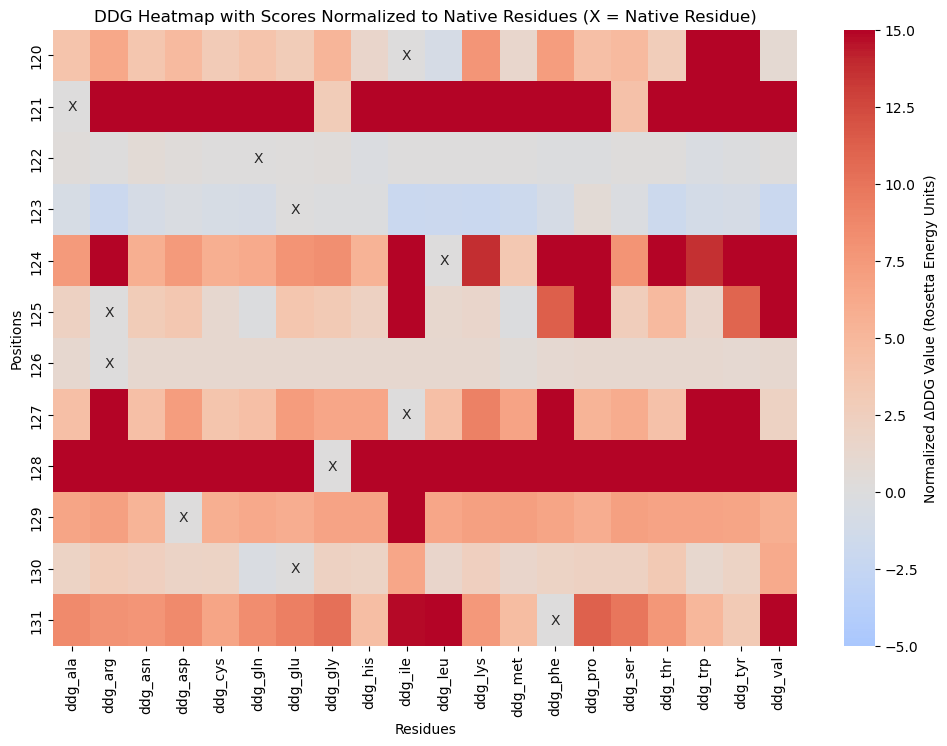

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define the native residues for each position
native_residues = {
    "120A": "ddg_ile",
    "121A": "ddg_ala",
    "122A": "ddg_gln",
    "123A": "ddg_glu",
    "124A": "ddg_leu",
    "125A": "ddg_arg",
    "126A": "ddg_arg",
    "127A": "ddg_ile",
    "128A": "ddg_gly",
    "129A": "ddg_asp",
    "130A": "ddg_glu",
    "131A": "ddg_phe"
}

# Normalize each position by subtracting the score of the native residue for that position
for index, row in df.iterrows():
    position = row['Description'].split('_')[-1]
    native_residue = native_residues.get(position)
    
    if native_residue:
        native_value = row[native_residue]
        df.loc[index, df.columns[1:]] -= native_value

# Drop the 'Description' column to keep only numeric values for the heatmap
df_numeric = df.drop(columns=['Description'])

# Create an annotation matrix to indicate native residues
annotation_matrix = np.empty(df_numeric.shape, dtype=str)

# Populate the annotation matrix with 'X' for native residues
for index, row in df.iterrows():
    position = row['Description'].split('_')[-1]
    native_residue = native_residues.get(position)
    
    if native_residue:
        # Find the column index for the native residue in the DataFrame
        col_index = df_numeric.columns.get_loc(native_residue)
        annotation_matrix[index, col_index] = 'X'

# Extract positions from native_residues keys for y-axis labels
y_labels = [pos[:-1] for pos in native_residues.keys()]  # Remove the 'A' suffix

# Plot the heatmap with specified scale limits and annotations
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric, cmap="coolwarm", center=0, annot=annotation_matrix, fmt='', 
            vmin=-5, vmax=15, cbar_kws={'label': 'Normalized ΔDDG Value (Rosetta Energy Units)'}, 
            yticklabels=y_labels)
plt.title("DDG Heatmap with Scores Normalized to Native Residues (X = Native Residue)")
plt.xlabel("Residues")
plt.ylabel("Positions")
plt.show()
